In [16]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Fri Jul  9 09:50:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+-------------------

In [1]:
!ls
!unzip /content/pixel-data_60m.zip

pixel-data_60m.zip  sample_data
Archive:  /content/pixel-data_60m.zip
   creating: pixel_data/
   creating: pixel_data/60m/
  inflating: pixel_data/60m/PPM_A027431_60m.csv  
  inflating: pixel_data/60m/PQM_A018880_20201017_60m.csv  
  inflating: pixel_data/60m/PPM_A027145_20200902T081611_1_60m.csv  
  inflating: pixel_data/60m/PQM_A018451_60m.csv  
  inflating: pixel_data/60m/PNM_A027474_20200925T082711_60m.csv  
  inflating: pixel_data/60m/PNL_A018780_20201010_60m.csv  


In [8]:
%cd /content/pixel_data/60m

/content/pixel_data/60m


In [9]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import gzip

%matplotlib inline

In [11]:
# First satellite image
with open('PNL_A018780_20201010_60m.csv', 'rb') as fd1:
    gzip_fd1 = gzip.GzipFile(fileobj=fd1)
    data1 = pd.read_csv(gzip_fd1)

# Check print
print(data1.iloc[0])

Unnamed: 0       0
C                1
B01           1190
B02            948
B03            899
B04            655
B05            895
B06           1882
B07           2392
B08           2273
B8A            382
B09             27
B10           1788
B11            844
B12           2596
Name: 0, dtype: int64


In [12]:
# Second satellite image
with open('PQM_A018880_20201017_60m.csv', 'rb') as fd2:
    gzip_fd2 = gzip.GzipFile(fileobj=fd2)
    data2 = pd.read_csv(gzip_fd2)

# Check print
print(data2.iloc[0])

Unnamed: 0       0
C                1
B01           1232
B02           1010
B03           1007
B04           1046
B05           1363
B06           2039
B07           2380
B08           2198
B8A            422
B09             17
B10           2981
B11           2071
B12           2677
Name: 0, dtype: int64


In [13]:
# Let's combine the pixels of the separately downloaded training satellite images
# NOTE. You could download more images (and thus construct a larger training set) if you wish
data = pd.concat([data1, data2], ignore_index=True)

In [18]:
xallpd = data.iloc[:, 2:]
indpd = data.iloc[:,0]
yallpd = data.iloc[:,1]

# Check prints
print('+------------- BANDS -----------+')
print(xallpd.iloc[3])
print('+------------- SHAPE -----------+')
print(xallpd.shape)
print(yallpd.shape)

+------------- BANDS -----------+
B01    1179
B02     933
B03     854
B04     697
B05    1010
B06    1953
B07    2420
B08    2144
B8A     405
B09      23
B10    1893
B11     931
B12    2706
Name: 3, dtype: int64
+------------- SHAPE -----------+
(6697779, 13)
(6697779,)


In [22]:
xall = pd.DataFrame(xallpd).to_numpy()
indall = pd.DataFrame(indpd).to_numpy()
yall = pd.DataFrame(yallpd).to_numpy()

# Check prints
print("Let's transform the pandas dataframes into numpy arrays and convert the labels from 1/2 to 0/1.")

print(np.shape(xall))
print(np.shape(yall))

print(np.count_nonzero(yall==1))
print(np.count_nonzero(yall==2))

yall[yall==1] = 0
yall[yall==2] = 1

print(np.count_nonzero(yall==0))
print(np.count_nonzero(yall==1))

print("0 = no cloud pixel, 1 = cloud pixel")

Let's transform the pandas dataframes into numpy arrays and convert the labels from 1/2 to 0/1.
(6697779, 13)
(6697779, 1)
5537590
1160189
5537590
1160189
0 = no cloud pixel, 1 = cloud pixel


In [23]:
with open('PNM_A027474_20200925T082711_60m.csv', 'rb') as fd3:
    gzip_fd3 = gzip.GzipFile(fileobj=fd3)
    data3 = pd.read_csv(gzip_fd3)

# Check print
print(data3.iloc[0])

Unnamed: 0       0
C                1
B01           1407
B02           1274
B03           1299
B04           1279
B05           1603
B06           2809
B07           3404
B08           3220
B8A            466
B09             54
B10           2940
B11           1694
B12           3905
Name: 0, dtype: int64


In [25]:
xallpd_test = data3.iloc[:, 2:]
indpd_test = data3.iloc[:,0]
yallpd_test = data3.iloc[:,1]
print('+------------- BANDS -----------+')
print(xallpd_test.iloc[3])
print(indpd_test.iloc[3])
print(yallpd_test.iloc[3])
print('+------------- SHAPE -----------+')
print(xallpd_test.shape)
print(yallpd_test.shape)

+------------- BANDS -----------+
B01    1419
B02    1191
B03    1212
B04    1085
B05    1497
B06    2671
B07    3237
B08    3012
B8A     471
B09      32
B10    2776
B11    1455
B12    3727
Name: 3, dtype: int64
3
1
+------------- SHAPE -----------+
(3348747, 13)
(3348747,)


In [26]:
xall_test = pd.DataFrame(xallpd_test).to_numpy()
indall_test = pd.DataFrame(indpd_test).to_numpy()
yall_test = pd.DataFrame(yallpd_test).to_numpy()

# Check prints
#print(np.shape(xall_test))
#print(np.shape(yall_test))

#print(np.count_nonzero(yall_test==1))
#print(np.count_nonzero(yall_test==2))

yall_test[yall_test==1] = 0
yall_test[yall_test==2] = 1

#print(np.count_nonzero(yall_test==0))
#print(np.count_nonzero(yall_test==1))

In [27]:
from sklearn.decomposition import PCA

# Compute the 3 first principal components for training data
pca = PCA(n_components=3)
pcacomp = pca.fit_transform(xall)

xall = pcacomp

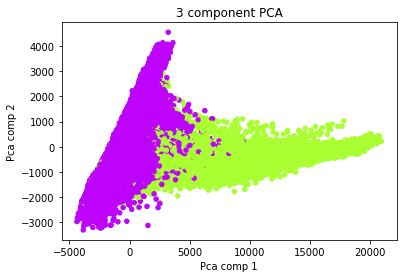

In [28]:
import seaborn as sns

# Create the plot 1 to illustrate the PCA results.
color_mapping = {0: sns.xkcd_rgb['bright purple'], 1: sns.xkcd_rgb['lime'], 2: sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x], yall.flatten()))
plt.scatter(pcacomp[:,0], pcacomp[:,1], s=20, c=colors)
plt.title("3 component PCA")
plt.xlabel("Pca comp 1")
plt.ylabel("Pca comp 2")
plt.show()

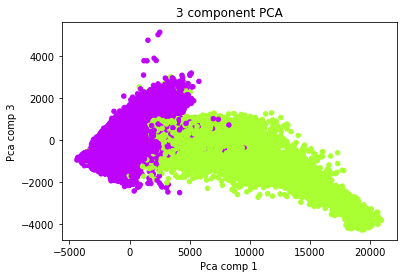

In [29]:
# Create the plot 2 to illustrate the PCA results.
color_mapping = {0: sns.xkcd_rgb['bright purple'], 1: sns.xkcd_rgb['lime'], 2: sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x], yall.flatten()))
plt.scatter(pcacomp[:,0], pcacomp[:,2], s=20, c=colors)
plt.title("3 component PCA")
plt.xlabel("Pca comp 1")
plt.ylabel("Pca comp 3")
plt.show()

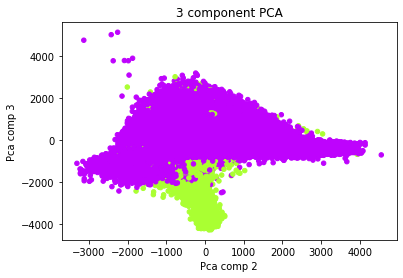

In [30]:
# Create the plot 3 to illustrate the PCA results.
color_mapping = {0: sns.xkcd_rgb['bright purple'], 1: sns.xkcd_rgb['lime'], 2: sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x], yall.flatten()))
plt.scatter(pcacomp[:,1], pcacomp[:,2], s=20, c=colors)
plt.title("3 component PCA")
plt.xlabel("Pca comp 2")
plt.ylabel("Pca comp 3")
plt.show()

In [31]:
# Compute the 3 first principal components for test data
pca_test = PCA(n_components=3)
pcacomp_test = pca_test.fit_transform(xall_test)

xall_test = pcacomp_test